#Modelling 



Following performing data cleaning and EDA, the team explored 3 different classifiers to build learning models to predict the risk of suffering Cardiovascular Disease (CVD). The following are the classifiers explored:


1.   K-Nearest Neighbours (kNN)
2.   C-Support Vector 
3.   Random Forest 



The team had to perform a process known as features encoding where values from the dataset were taken and encoded to 0s and 1s.

Why is C Support Vector classifer considered?

- Capable of modeling a large dataset​
- Robust against outliers 

Why is K Nearest Neighbour classifer considered?
- Can be used for multiclass classification ​
- Ideal for non-linear data since there's no assumption about underlying data

Why is Random Forest classifer considered?
- Lower risk of overfitting​
- Can automatically balance data sets when a class is more infrequent than other classes in the data

In [ ]:
import numpy as np 
import pandas as pd # data processing

In [ ]:
import plotly.graph_objects as go
import plotly.express as px


import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

#Modelling 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, mean_squared_error, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict
from scipy.stats import randint
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
continuous_f = ["Age", "MaxHR", "Oldpeak"]
categorical_f = ["ChestPainType", "ST_Slope"]
binaries_f = ["FastingBS", "ExerciseAngina"]

## Encoding Process

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving finalHD.csv to finalHD.csv


In [ ]:
df = pd.read_csv('finalHD.csv')
df.head()

,Unnamed: 0,ChestPainType,FastingBS,ExerciseAngina,ST_Slope,Age,MaxHR,Oldpeak,HeartDisease
0,0,ATA,0,N,Up,40,172,0.0,0
1,1,NAP,0,N,Flat,49,156,1.0,1
2,2,ATA,0,N,Up,37,98,0.0,0
3,3,ASY,0,Y,Flat,48,108,1.5,1
4,4,NAP,0,N,Up,54,122,0.0,0


In [ ]:
df_clean = df.drop(["Unnamed: 0"], axis=1)
df_clean

,ChestPainType,FastingBS,ExerciseAngina,ST_Slope,Age,MaxHR,Oldpeak,HeartDisease
0,ATA,0,N,Up,40,172,0.0,0
1,NAP,0,N,Flat,49,156,1.0,1
2,ATA,0,N,Up,37,98,0.0,0
3,ASY,0,Y,Flat,48,108,1.5,1
4,NAP,0,N,Up,54,122,0.0,0
...,...,...,...,...,...,...,...,...
913,TA,0,N,Flat,45,132,1.2,1
914,ASY,1,N,Flat,68,141,3.4,1
915,ASY,0,Y,Flat,57,115,1.2,1
916,ATA,0,N,Flat,57,174,0.0,1


In [ ]:
df_clean.to_csv("convert.csv") #create new csv file with cleaned data set 


### Binaries Encoding 



In [ ]:
df_clean["ExerciseAngina"] = df_clean["ExerciseAngina"].map({'N':0, 'Y':1})
df_clean

,ChestPainType,FastingBS,ExerciseAngina,ST_Slope,Age,MaxHR,Oldpeak,HeartDisease
0,ATA,0,0,Up,40,172,0.0,0
1,NAP,0,0,Flat,49,156,1.0,1
2,ATA,0,0,Up,37,98,0.0,0
3,ASY,0,1,Flat,48,108,1.5,1
4,NAP,0,0,Up,54,122,0.0,0
...,...,...,...,...,...,...,...,...
913,TA,0,0,Flat,45,132,1.2,1
914,ASY,1,0,Flat,68,141,3.4,1
915,ASY,0,1,Flat,57,115,1.2,1
916,ATA,0,0,Flat,57,174,0.0,1


### Data binning (continuous features) 

In [ ]:
df_bin = df_clean.copy()
for feature in continuous_f:
    bins = 5
    df_bin[feature] = pd.cut(df[feature], bins=bins, labels=range(bins)).astype(np.int64)
    
    



In [ ]:
df_bin

,ChestPainType,FastingBS,ExerciseAngina,ST_Slope,Age,MaxHR,Oldpeak,HeartDisease
0,ATA,0,0,Up,1,3,1,0
1,NAP,0,0,Flat,2,3,2,1
2,ATA,0,0,Up,0,1,1,0
3,ASY,0,1,Flat,2,1,2,1
4,NAP,0,0,Up,2,2,1,0
...,...,...,...,...,...,...,...,...
913,TA,0,0,Flat,1,2,2,1
914,ASY,1,0,Flat,4,2,3,1
915,ASY,0,1,Flat,2,1,2,1
916,ATA,0,0,Flat,2,4,1,1


### One-hot Encoding (concat categorical and continuous features together)

In [ ]:
df_dumm = pd.get_dummies(df_bin, columns = categorical_f+continuous_f)
df_dumm

,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
914,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
915,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
916,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
df_dumm.to_csv("current.csv") #create new csv file with cleaned data set 

The data stored in this csv file is now converted to binary values. 

## Model Building 

In [ ]:
#read dataset after binning and converting values to binary values fr data 
df_new = pd.read_csv('current.csv')
df_new.head()

,Unnamed: 0,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_new.describe()

,Unnamed: 0,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,458.500000,0.233115,0.404139,0.553377,0.540305,0.188453,0.221133,0.050109,0.068627,0.501089,...,0.029412,0.190632,0.399782,0.305011,0.075163,0.007625,0.535948,0.386710,0.066449,0.003268
std,265.148072,0.423046,0.490992,0.497414,0.498645,0.391287,0.415236,0.218289,0.252957,0.500271,...,0.169050,0.393013,0.490120,0.460663,0.263799,0.087037,0.498978,0.487262,0.249201,0.057104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,229.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,458.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,687.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the train and test sets 

In [ ]:
df_cur = df_new.copy()

df_cur1 = df_cur.drop(["Unnamed: 0"], axis=1)
df_cur1

,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
914,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
915,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
916,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
X = df_cur1.drop(["HeartDisease"], axis=1)
y = df_cur1["HeartDisease"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train

,FastingBS,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_0,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
485,1,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
486,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
117,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
361,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
296,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
201,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
462,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
252,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
X_test #sanity check to see if the total rows of test and train adds up to 918

,FastingBS,ExerciseAngina,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_0,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
356,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
763,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
817,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
735,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
892,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
752,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
492,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
622,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


### Functions to consolidate metrics that compare models

In [ ]:
def print_scores(y, y_pred):
    ac, pr, rc, f1 = accuracy_score(y, y_pred)*100, precision_score(y, y_pred)*100, recall_score(y, y_pred)*100, f1_score(y, y_pred, average='weighted')*100
    print(f"Accuracy:{round(ac, 2)}")
    print(f"Precision:{round(pr, 2)}")
    print(f"Recall:{round(rc, 2)}")
    print(f"F1-score:{round(f1, 2)}")
    return {'ac': ac, 'pr':pr, 'rc':rc, 'f1':f1}
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    

### Support Vector Machine (SVM classification)

In [ ]:
param_grid = [{
    "C": np.linspace(1, 1.5, 10),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto']
}]
metric = "recall"

svc_clf = SVC()
grid_svc = GridSearchCV(svc_clf, param_grid, scoring=metric)
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.        , 1.05555556, 1.11111111, 1.16666667, 1.22222222,
       1.27777778, 1.33333333, 1.38888889, 1.44444444, 1.5       ]),
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='recall')

In [ ]:
best_svc_clf = grid_svc.best_estimator_
grid_svc.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'poly'}



---


##### Support Vector Machine on train set

<Axes: >

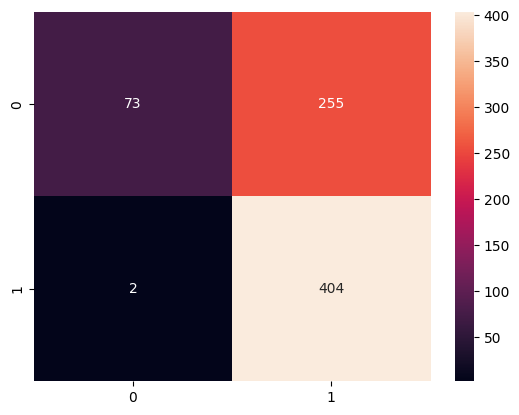

In [ ]:
y_train_pred = cross_val_predict(best_svc_clf, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

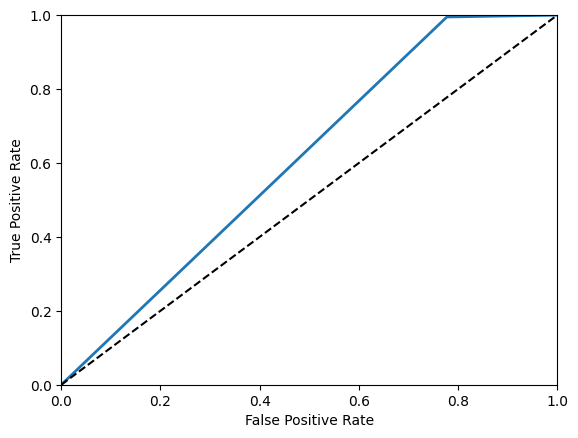

In [ ]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_svc, tpr_svc, "SVC")
plt.show()

In [ ]:
roc_auc_score(y_train, y_train_pred)

0.6088174336176859

In [ ]:
svc_scores = print_scores(y_train, y_train_pred)

Accuracy:64.99
Precision:61.31
Recall:99.51
F1-score:58.15


---
##### Support Vector Machine on test set

<Axes: >

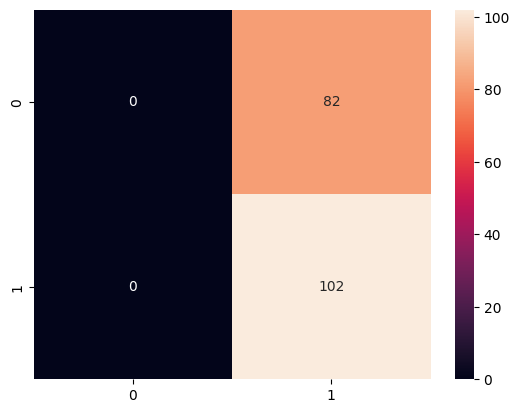

In [ ]:
y_test_pred = cross_val_predict(best_svc_clf, X_test, y_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')


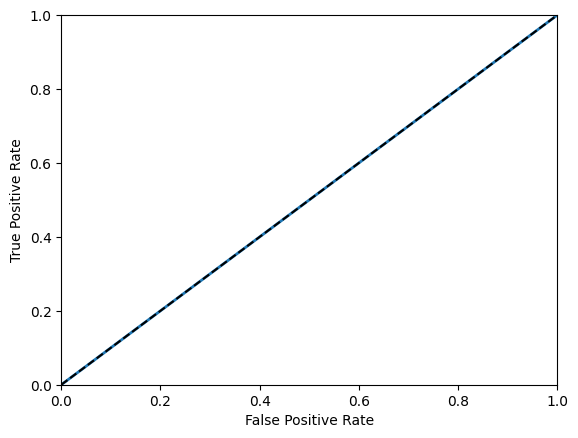

In [ ]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_svc, tpr_svc, "SVC")
plt.show()

In [ ]:
roc_auc_score(y_test, y_test_pred)

0.5

In [ ]:
svc_scores = print_scores(y_test, y_test_pred)

Accuracy:55.43
Precision:55.43
Recall:100.0
F1-score:39.54





---



### k-Nearest Neighbours Classifier (kNN Classification)


In [ ]:
#import the KNeighborsClassifier object
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
nFeatures = len(X_train.columns)

In [ ]:
knn = KNeighborsClassifier() # create the KNeighborsClassifier object

param_grid = [{'n_neighbors' : np.arange(0, 31),'weights':['uniform', 'distance'],'p':[1, 2]}]

grid_knn = GridSearchCV(knn, param_grid, scoring = 'recall')

grid_knn

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='recall')

In [ ]:
grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='recall')

In [ ]:

best_knn_clf = grid_knn.best_estimator_
print(best_knn_clf)
print(grid_knn.best_params_)



KNeighborsClassifier(n_neighbors=11, p=1)
{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


---
##### k-Nearest Neighbors on train set

<Axes: >

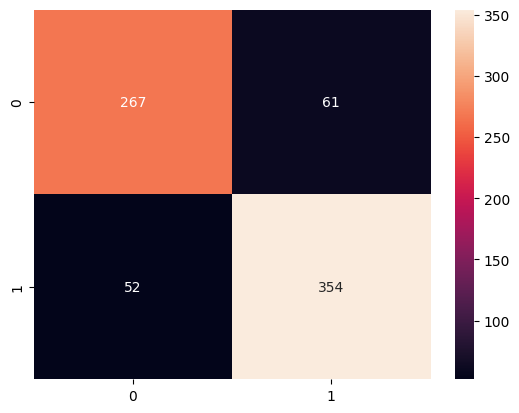

In [ ]:
y_train_pred = cross_val_predict(best_knn_clf, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')


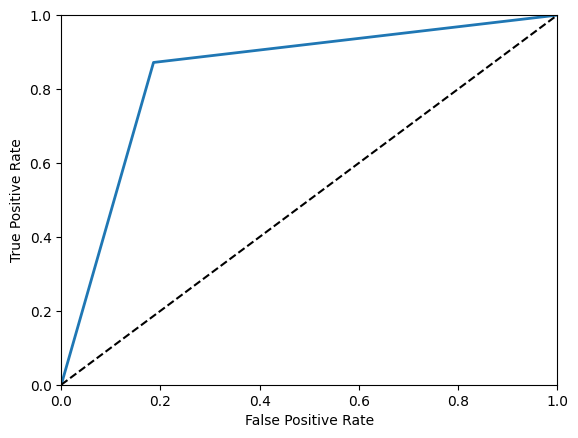

In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()

In [ ]:
roc_auc_score(y_train, y_train_pred)

0.8429727862549561

In [ ]:
rf_scores = print_scores(y_train, y_train_pred)

Accuracy:84.6
Precision:85.3
Recall:87.19
F1-score:84.58


In [ ]:
grid_knn.fit(X_test, y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='recall')

In [ ]:

best_knn_clf = grid_knn.best_estimator_
print(best_knn_clf)
print(grid_knn.best_params_)



KNeighborsClassifier(n_neighbors=17, p=1)
{'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}


---
##### k-Nearest Neighbors on test set

<Axes: >

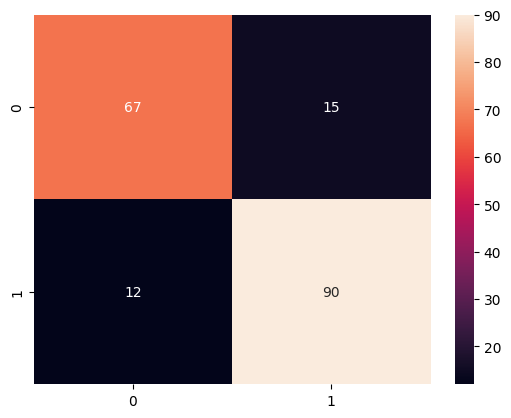

In [ ]:
y_test_pred = cross_val_predict(best_knn_clf, X_test, y_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')


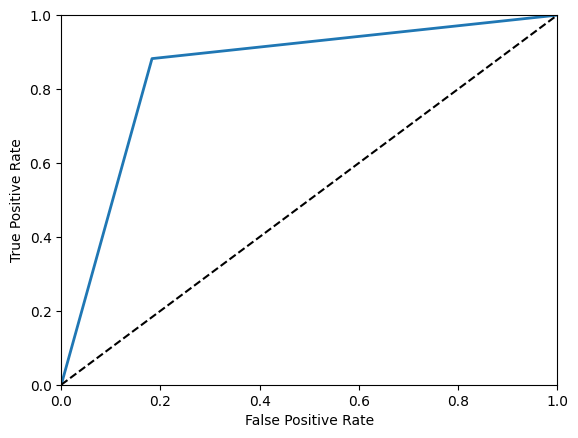

In [ ]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()

In [ ]:
roc_auc_score(y_test, y_test_pred)

0.849713055954089

In [ ]:
rf_scores = print_scores(y_test, y_test_pred)

Accuracy:85.33
Precision:85.71
Recall:88.24
F1-score:85.3


The k-Nearest Neighbour (kNN) classifier obtained a 0.87 for recall on train set and 0.88 on test set.

### Random Forest Classifier 

Hyperparameters changed to increase predictive power:
*   n_estimators (set to 100) 
*  criterion (set to gini), default is gini and MSE



Hyperparameters changed to increase the speed:
    - 

*   n_jobs
*   random_state
*   oob_score



In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, criterion='gini',  n_estimators=100,
                                  oob_score=True
                                 )

classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf .predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.799


##### Hyperparameter tuning for RandomForest using GridSearchCV to fit the data

Precision = Total predicted pos - so it talks about how precise the model is

Recall = total actual pos - how many actual pos the model has captured through (TP) - model metric used when there is a high cost associated with false negative


> often used in sick patient detection where if a sick patient (AP) goes thru the test and is predicted as not sick (PN)




F1 score = seek balance between precision and recall (& if there is an uneven class distribution aka large number of actual negatives)




In [ ]:
nFeatures 

24

In [ ]:
metric = 'recall'

In [ ]:
#param_grid = [{"n_estimators":[650, 700, 750, 800], 'criterion':['gini','entropy'], "max_features":[nFeatures-9, nFeatures-8, nFeatures-5]}]

param_grid = [{"n_estimators":[800, 850, 900,
                                   950],
               'criterion':['gini','entropy'],
               "max_features":[nFeatures-9, nFeatures-8, nFeatures-5]
              }]
rf_clf = RandomForestClassifier(random_state=42)

grid_forest = GridSearchCV(rf_clf, param_grid,scoring=metric)
grid_forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': [15, 16, 19],
                          'n_estimators': [800, 850, 900, 950]}],
             scoring='recall')

In [ ]:
grid_forest.best_score_

0.8472146943691659

In [ ]:
best_rf_clf = grid_forest.best_estimator_
best_rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 15,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

---
##### Random Forest on train set

<Axes: >

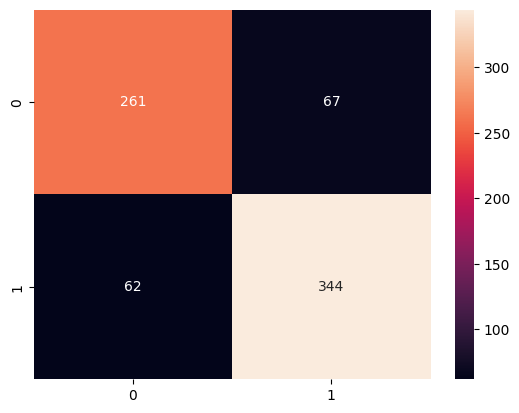

In [ ]:
y_train_pred = cross_val_predict(best_rf_clf, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

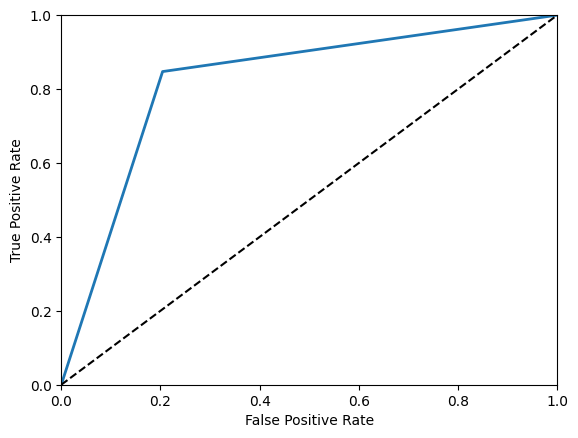

In [ ]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [ ]:
roc_auc_score(y_train, y_train_pred)

0.8215111738555809

In [ ]:
rf_scores = print_scores(y_train, y_train_pred) 

Accuracy:82.43
Precision:83.7
Recall:84.73
F1-score:82.41


---
##### Random Forest on test set

<Axes: >

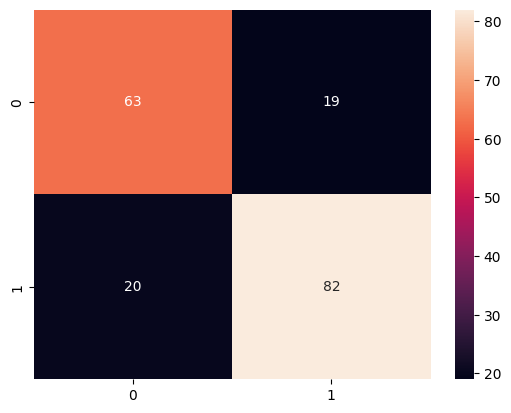

In [ ]:
y_test_pred = cross_val_predict(best_rf_clf, X_test, y_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

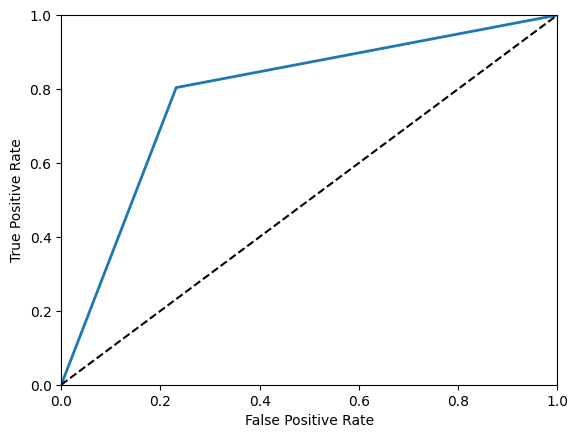

In [ ]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [ ]:
roc_auc_score(y_test, y_test_pred)

0.7861071257771401

In [ ]:
rf_scores = print_scores(y_test, y_test_pred) 

Accuracy:78.8
Precision:81.19
Recall:80.39
F1-score:78.82


# Best model for prediction

We will focus mainly on the 2 metrics of recall and F1 score. A low false negative value is crucial to a good model involving health illness, as we would not want to wrongly diagnose a patient to be free from CVD when he or she has it. Accurate diagnosis would then allow for early intervention and better management for the patient. This can be obtained from using the recall value. A high F1 score is also important as it incorporates both recall and precision. 

Based on the results we obtained, we found that the C Support Vector Classifier has the highest Recall value of 100. However, it has the lowest F1 score of 39.54.
The low F1 score makes it less ideal as compared to the K Nearest Neighbour classifier which has a relatively high Recall value of 88.24 and a signifcantly higher F1 score of 85.30.

Therefore we conclude that the KNN classifier is the best classification model that will be able to predict CVD with the respective predictors.  